In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2
import time
import warnings
import pickle
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
# import tensorflow  as tf
from joblib import dump, load
import matplotlib.pyplot as plt
# import tensorflow_probability  as tfp
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3, linewidth=120)

In [3]:
def mae(y_trues, y_preds):
    return np.mean(np.abs(y_trues-y_preds))

def rmse(y_trues, y_preds):
    return np.sqrt(np.mean(np.power(y_trues-y_preds, 2)))

def mrae(y_trues, y_preds):
    return np.mean(np.abs(np.divide(y_trues -y_preds, y_trues)))

In [4]:
pld_complete_range = pd.read_csv("../../data/pld_complete_range.csv", index_col=False)
# pld_complete = catalog.load('pld_complete').dropna().sort_values('pos', ascending=True)

In [5]:
pld_complete_range.head()

,median_Voltage_HSR_V_1025,median_Voltage_HSR_V_1027,median_Voltage_HSR_V_1030,median_Voltage_HSL_V_1025,median_Voltage_HSL_V_1027,median_Voltage_HSL_V_1030,median_Voltage_HF_V_1025,median_Voltage_HF_V_1027,median_Voltage_HF_V_1030,median_Voltage_HC_V_1025,...,std_Sigma_1030,pos,Speed,X FWHM,Y FWHM,R FWHM,Coolness,Coolness_neg,Ic,Ic_norm
0,0.129479,0.177414,0.005142,0.69562,-0.256257,-0.015406,-0.009215,-0.072807,-0.021102,0.057123,...,-0.390667,-0.501695,0.009841,0.039589,0.067470,0.015697,0.053006,-0.086369,496.2,1.767913
1,0.110059,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.009215,-0.173901,-0.021102,0.050178,...,-0.390667,-0.501652,-0.005266,0.039589,0.067470,0.015697,0.053006,-0.086369,494.7,1.762568
2,0.119769,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.007363,-0.173901,-0.021102,0.057123,...,-0.390667,-0.501646,-0.007197,0.039589,0.067470,0.015697,0.053006,-0.086369,494.2,1.760787
3,0.110059,0.348139,0.005142,0.69562,-0.322354,-0.015406,-0.009215,-0.218270,-0.021102,0.057123,...,-0.390667,-0.501635,-0.010946,0.039589,0.067470,0.015697,0.053006,-0.086369,495.5,1.765419
4,0.110059,0.264593,0.005142,0.69562,-0.305820,-0.015406,-0.009215,-0.129533,-0.021102,0.057123,...,-0.390667,-0.501619,-0.017147,0.042682,0.069442,0.017956,0.051965,-0.084836,497.9,1.773168


In [6]:
x_r = pld_complete_range.loc[:, pld_complete_range.columns.isin(['Ic', 'Coolness'])]  # .to_numpy()
y = pld_complete_range['pos']  # .to_numpy()

pos = pld_complete_range['pos'].to_numpy()
ic_norm = pld_complete_range['Ic_norm'].to_numpy()
ic = pld_complete_range['Ic'].to_numpy()

coolness = pld_complete_range['Coolness'].to_numpy()
x_r.shape, y.shape, pos.shape

((18561, 2), (18561,), (18561,))

In [7]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.40,
                                                        random_state=43,)

x_r_val, x_r_test, y_val, y_test = train_test_split(x_r_test, y_test,
                                                        test_size=0.5,
                                                        random_state=43,)


x_r_train.shape, x_r_test.shape, x_r_val.shape, y_train.shape, y_test.shape, y_val.shape

((11136, 2), (3713, 2), (3712, 2), (11136,), (3713,), (3712,))

In [8]:
set(x_r.iloc[:, 1] == ic), set(x_r.iloc[:, 0] == coolness)

({True}, {True})

In [9]:
set(x_r.loc[:, 'Ic'] == ic), set(x_r.loc[:, 'Coolness'] == coolness)

({True}, {True})

In [10]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.25,
                                                        random_state=43,)

x_r_train.shape, x_r_test.shape, y_train.shape, y_test.shape

((13920, 2), (4641, 2), (13920,), (4641,))

# The Purpose of this study : 

Let us start with the notation:

**Notation:**

Let $D = \{f^{1}_{j}, f^{2}_{j}, ..., p_{j}, c_{j}, i_{j}, f^{M}_{j} \}_{j=1}^{N}$ be our data set. 
Where $N$ represents the number of observations and $M$ represent the number of features (the superscripts represent  the feature indices).
Among all of the features, we are going to focus on three specific features, that is, position $p_j$, coolness $c_j$, critical current $i_j$. (This is why we represent them with different letters than f).

The goal is to match the "coolnesses", the "positions" and the "critical currents" such that for a given $p_j:$ $\frac{c_j}{i_j} \approx constant$


Based on the two following assumptions there would be two possibilities for matching :

1. correlated positions assumption: in this situation we assume that in the current version of data set, there is a correlation between these three features (pos, i_c, cool) --which is to be discovered.

    Concretely, for any $ j$ there exists a $x_j$ such that $p_j \times x_j \approx \frac{i_j}{c_j} = r_j$. 
    Thus, the $x_j$'s can be explained as parameters of a function as follows.
   In other words, there should be a function $F_\phi(i_j, c_j) \approx p_j$ where $\phi$ represent the model parameters to be estimated: such that $x_j \sim \phi$.

    Clearly, the aforementioned case can be treated as a supervised learning problem s.t the position would be the target value and the two remaining items would be the training features.

2. uncorrelated positions assumption: In this situation, we assume that in the current version of data set, there is no correlation between the position's values ($p_j$) and the values of coolness ($c_j$) and critical current ($i_j$).

    Thus the task under this assumption can be solved by applying a greedy search algorithm: to find $p_j$ minimizing $r_{jk}$ as follows. 
    
    -specify a condition, say the ratio between coolness and critical should be minimized.
    
        - Here we define this condition to be the $r_{jk}$ to be minimized.
        - A more complicated condition can be also defined -- though I think some knowledge from the process is needed in this regard. 
        
    \begin{equation}
    \underset{k=1, ..., N}{\operatorname{argmin}} r_{jk}=\frac{i_j}{c_{k}}  \ \ \  j=1, ..., N
    \label{search_k}
    \end{equation}

    That is, any observation $j$ we fix its critical current and its position and then we will find that $c_k$ which the value $r_{jk}$ is minimized(maximized). Ties should be broken randomly (all taken into account at the same time). 
    
    With this setting, we match positions, critical currents and the coolnesses w.r.t to a pre-specified condition.


**Andrey**

Will reply here, since I can write latex

Very much like the second option, as I understand it.


With a bit different description:

In ideal alignment, there is a dependence $I = f(C) + \varepsilon$

When we have distorted alignment, $I\{p_i^I\}$ and $C\{p_j^C\}$ are values of I and C 
known at positions $\{p_i^I\}$ and $\{p_j^C\}$

The task is to find a transformation $\{p_j^C\} \rightarrow^T \{p_j^*\}$ such, that

$$\sum_i |\frac{I\{p_i^I\}}{f(C^*\{p_i^I\})}| \rightarrow min ,$$
    
where $C^*\{p_i^I\}$ are the interpolations of $C\{p_j^*\}$ (values of $C$ are same, but only $p$'s are transformed) at points $\{p_i^I\}$


- f: Ic = A*(100-coolness) + B

A: coeff. depend on $p_{i}$


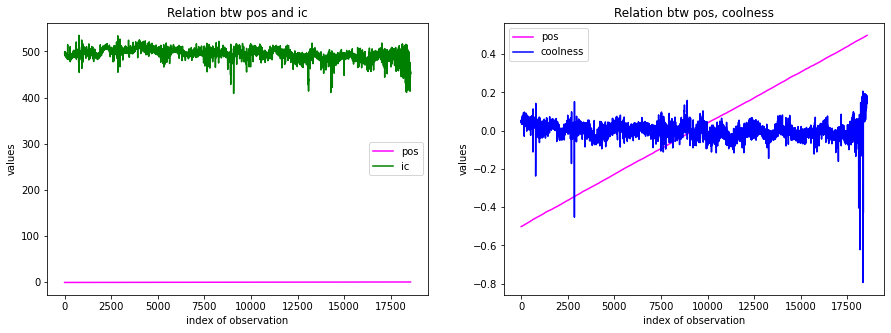

In [11]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(pos, 'magenta', label='pos')
# ax.plot(coolness, 'blue', label='coolness')
ax.plot(ic, 'green', label='ic')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos and ic')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(pos, 'magenta', label='pos')
ax.plot(coolness, 'blue', label='coolness')
# ax.plot(ic_norm, 'green', label='ic_norm')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos, coolness')
ax.legend()

plt.show()

### Aligment by gready search

In [12]:

def sets_aligner(ic, pos_i, coolness, pos_c):    
    mapped_coolness = []
    mapping = {}
    for i in range(len(ic)):
        if i % 100 == 0:
            print("remaining:", len(ic)-i)
        mapping[i] = {}
        r_ij = np.divide(ic[i], coolness)
        argsorts = np.argsort(r_ij)
        for j in argsorts:
            if j not in mapped_coolness:
                mapped_coolness.append(j)
                mapping[i]['j'] = j  # coolness index
                mapping[i]['r_ij'] = r_ij[j]
                mapping[i]['i-pos'] = pos[i]  
                mapping[i]['i-val'] = ic[i]
                mapping[i]['c-val'] = coolness[j]  
                # mapping[i]['c-pos'] = pos_c[j]  # should be added later     
                break 
    return mapping, mapped_coolness

In [ ]:
%%time
mapping, mapped_coolness = sets_aligner(ic=ic, pos_i=pos, coolness=coolness, pos_c=None)

remaining: 18561
remaining: 18461
remaining: 18361
remaining: 18261
remaining: 18161
remaining: 18061
remaining: 17961
remaining: 17861
remaining: 17761
remaining: 17661
remaining: 17561
remaining: 17461
remaining: 17361
remaining: 17261
remaining: 17161
remaining: 17061
remaining: 16961
remaining: 16861
remaining: 16761
remaining: 16661
remaining: 16561
remaining: 16461
remaining: 16361
remaining: 16261
remaining: 16161
remaining: 16061
remaining: 15961
remaining: 15861
remaining: 15761
remaining: 15661
remaining: 15561
remaining: 15461
remaining: 15361
remaining: 15261
remaining: 15161
remaining: 15061
remaining: 14961
remaining: 14861
remaining: 14761
remaining: 14661
remaining: 14561
remaining: 14461
remaining: 14361
remaining: 14261
remaining: 14161
remaining: 14061
remaining: 13961
remaining: 13861
remaining: 13761
remaining: 13661
remaining: 13561
remaining: 13461
remaining: 13361
remaining: 13261
remaining: 13161
remaining: 13061
remaining: 12961
remaining: 12861
remaining: 127

In [17]:
for k, v in mapping.items():
    print(k, v)

0 {'j': 2383, 'r_ij': -25684067.911421843, 'i-pos': -0.5016945638004741, 'i-val': 496.2, 'c-val': -1.9319369568375e-05}
1 {'j': 16176, 'r_ij': -21427477.37274882, 'i-pos': -0.5016515650619859, 'i-val': 494.7, 'c-val': -2.3087178737575187e-05}
2 {'j': 2942, 'r_ij': -15560034.136189617, 'i-pos': -0.5016460689826302, 'i-val': 494.2, 'c-val': -3.176085577155559e-05}
3 {'j': 8326, 'r_ij': -13797979.328330154, 'i-pos': -0.5016354001227046, 'i-val': 495.5, 'c-val': -3.5911055395092114e-05}
4 {'j': 6956, 'r_ij': -13395081.24763893, 'i-pos': -0.5016192351834233, 'i-val': 497.9, 'c-val': -3.7170360582005564e-05}
5 {'j': 2538, 'r_ij': -12384785.492654495, 'i-pos': -0.5015600715056541, 'i-val': 496.4, 'c-val': -4.008143704179765e-05}
6 {'j': 17932, 'r_ij': -12279927.719713254, 'i-pos': -0.5015494026457283, 'i-val': 494.9, 'c-val': -4.030154014713991e-05}
7 {'j': 3439, 'r_ij': -11333665.091680067, 'i-pos': -0.5014899156691733, 'i-val': 494.3, 'c-val': -4.3613429195367774e-05}
8 {'j': 9466, 'r_ij': 

In [20]:
len(mapped_coolness) == len(coolness)

True

In [21]:
len(ic) == len(mapping.keys())

True

In [ ]:
# with open('mapping.pkl', 'wb') as fp:
#     pickle.dump(mapping, fp)
    

In [15]:
with open ("mapping.pkl", 'rb') as fp:
    mapping = pickle.load(fp)

    

##### Conclusion 

- Under this assumption: for a given critical current and its corresponding position we find the corresponding coolness value and its position so that the ratio between ic and coolness is minimized.

- Noteworthy to add that, as for now the coolness position is the same as ic (after a meeting with Andrey Sapranov I'll modify it correspondingly)


Future:

ARI or NMI are the metrics the set_aligners with ground_truth 

new_p = 0.0001*old_p + 1.
